In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Cargo los datos en un dataframe llamado pisos, del conjunto del merge que hicimos en el paso de transformacion de datos
donde quiero juntar los pisos del 2020 que aun siguen en 2021

In [12]:
pisos<-read.csv('data origin/pisos_cleaned_agrupando_merge_2021.csv',sep = ';')


Precio - PLANTA desglosado por CIUDAD=VALLADOLID y BILBAO

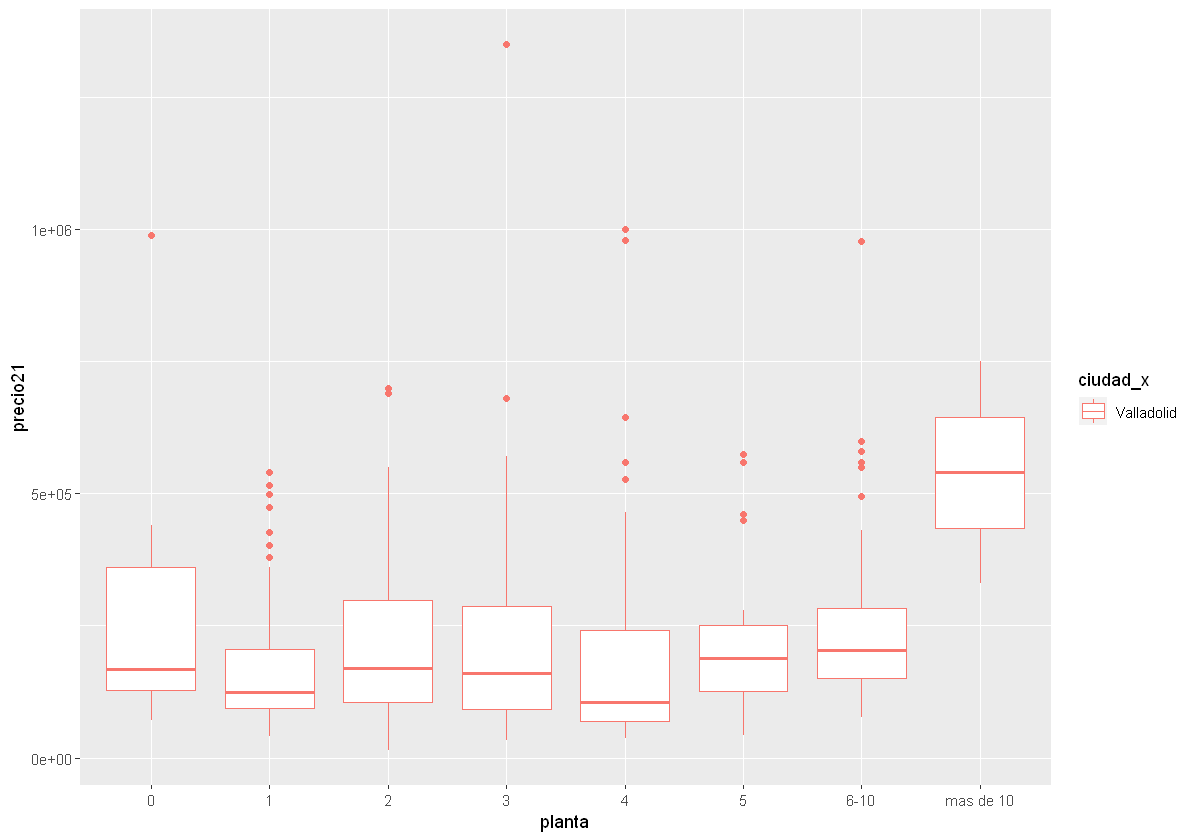

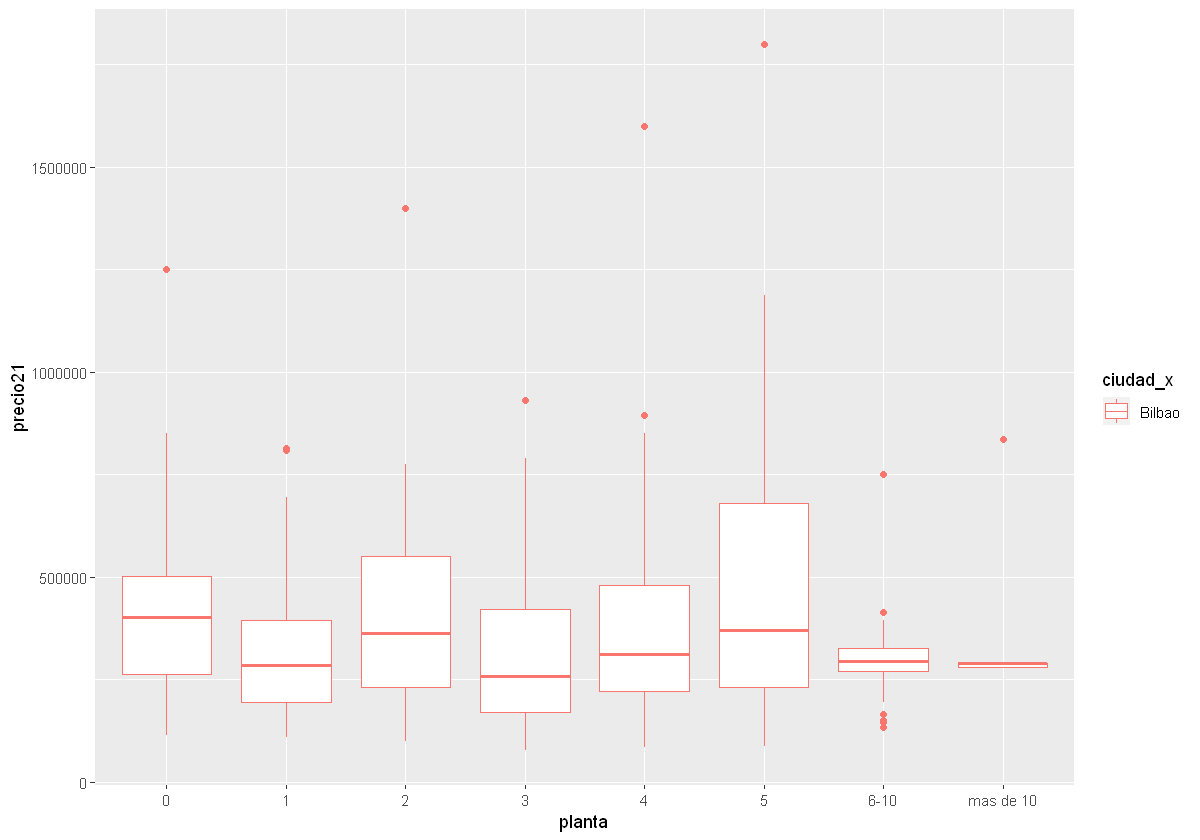

In [18]:
pisos_val<-data.frame(pisos[pisos$ciudad_x=="Valladolid",])
options(repr.plot.height=7,repr.plot.width=10)
ggplot(pisos_val,aes(x=planta,y=precio21,color=ciudad_x))+geom_boxplot()
pisos_bilbao<-data.frame(pisos[pisos$ciudad_x=="Bilbao",])
options(repr.plot.height=7,repr.plot.width=10)
ggplot(pisos_bilbao,aes(x=planta,y=precio21,color=ciudad_x))+geom_boxplot()


Compruebo normalidad de los datos: Realizo el test de Saphiro para saber si los datos siguen una distribucion normal (Hipotesis nula)

Como el Pvalor es demasiado pequeño, rechazo la Hipotesis nula, esto quiere decir que no puedo aplicar ANOVA y tengo que usar una prueba no paramétrica -- Krustal Wallis

Quiero saber si el precio de los diferentes pisos depende del número de planta.

Variable cuantitativa: precio

Variable cualitativa : planta

El objetivo es comparar la media del precio de la planta 0, con la de la planta 1 y asi sucesivamente.
Tomoa como hipótesis nula que el precio medio por cada planta es el mismo.
Así, si llamo µ a la media de precio en cada planta.

H0: Todas las plantas tienen igual precio

H1: Todas tienen distinto precio

A partir de estas hipótesis hay que comprobar si la diferencia que existe entre las medias es debida a la altura, o si las
diferencias observadas se podrían explicar simplemente por azar
Valor p > α -- ACEPTO la H0. Las diferencias entre las medianas no es estadísticamente significativas. Por tanto, el precio de cada vivienda no depende de la altura.
 



In [14]:
#Compruebo normalidad de los datos: Realizo el test de Saphiro para saber si los datos siguen una distribucion normal 
#(Hipotesis nula)

for (tipo in levels(pisos$planta)){
    df<-subset(pisos,planta==tipo)
    print(paste("Planta",tipo," = ",mean(df$precio21,na.rm=T)))
    
    sp<-shapiro.test(df$precio21)
    print(paste(" - Test shapiro pvalor = ",sp$p.value))
}

#Pvalor es demasiado pequeño, por tanto, rechazo la Hipotesis nula. No siguen dist normal
#No puedo aplicar ANOVA y tengo que usar una prueba no paramétrica -- Krustal Wallis

kt<-kruskal.test(precio21~planta,pisos)


paste("Pvalor=",kt$p.value)



[1] "Planta 0  =  358727.933333333"
[1] " - Test shapiro pvalor =  2.41864065265674e-06"
[1] "Planta 1  =  218665.367021277"
[1] " - Test shapiro pvalor =  1.7817340871873e-13"
[1] "Planta 2  =  269261.978609626"
[1] " - Test shapiro pvalor =  1.08836333808733e-11"
[1] "Planta 3  =  258048.663101604"
[1] " - Test shapiro pvalor =  1.04348576065361e-13"
[1] "Planta 4  =  279713.913043478"
[1] " - Test shapiro pvalor =  2.56237592617962e-11"
[1] "Planta 5  =  342031.590909091"
[1] " - Test shapiro pvalor =  2.31391835787426e-10"
[1] "Planta 6-10  =  268666.462184874"
[1] " - Test shapiro pvalor =  2.65449497966879e-09"
[1] "Planta mas de 10  =  436428.571428571"
[1] " - Test shapiro pvalor =  0.0020655966989193"


[1] "Pvalor= 2.51186776002443e-07"

In [19]:
model_vall<-lm(pisos_val, formula=precio21~planta)
summary(model_vall)

model_bilbao<-lm(pisos_bilbao, formula=precio21~planta)
summary(model_bilbao)

modelo<-lm(pisos, formula=precio21~planta)
summary(modelo)


Call:
lm(formula = precio21 ~ planta, data = pisos_val)

Residuals:
    Min      1Q  Median      3Q     Max 
-210000 -101300  -46543   59787 1134787 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       247536      29310   8.446 2.49e-16 ***
planta1           -86663      32451  -2.671  0.00779 ** 
planta2           -38020      32475  -1.171  0.24218    
planta3           -32323      32656  -0.990  0.32269    
planta4           -57480      34825  -1.651  0.09938 .  
planta5           -46452      38417  -1.209  0.22710    
planta6-10          2846      33947   0.084  0.93322    
plantamas de 10   292464     113516   2.576  0.01023 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 155100 on 574 degrees of freedom
Multiple R-squared:  0.04924,	Adjusted R-squared:  0.03764 
F-statistic: 4.247 on 7 and 574 DF,  p-value: 0.0001383



Call:
lm(formula = precio21 ~ planta, data = pisos_bilbao)

Residuals:
    Min      1Q  Median      3Q     Max 
-366214 -146534  -48034   85000 1345786 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       424970      34161  12.440   <2e-16 ***
planta1           -94332      44988  -2.097   0.0367 *  
planta2           -40883      44988  -0.909   0.3641    
planta3           -96936      44039  -2.201   0.0283 *  
planta4           -15538      48310  -0.322   0.7479    
planta5            29244      47815   0.612   0.5412    
planta6-10       -115781      51471  -2.249   0.0251 *  
plantamas de 10   -29970     110164  -0.272   0.7857    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 234200 on 376 degrees of freedom
Multiple R-squared:  0.04318,	Adjusted R-squared:  0.02537 
F-statistic: 2.424 on 7 and 376 DF,  p-value: 0.01939



Call:
lm(formula = precio21 ~ planta, data = pisos)

Residuals:
    Min      1Q  Median      3Q     Max 
-300032 -139626  -54262   70898 1457968 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       358728      23856  15.038  < 2e-16 ***
planta1          -140063      28216  -4.964 8.17e-07 ***
planta2           -89466      28237  -3.168 0.001581 ** 
planta3          -100679      28237  -3.566 0.000381 ***
planta4           -79014      30663  -2.577 0.010119 *  
planta5           -16696      32467  -0.514 0.607191    
planta6-10        -90062      30459  -2.957 0.003185 ** 
plantamas de 10    77701      81648   0.952 0.341513    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206600 on 958 degrees of freedom
Multiple R-squared:  0.04136,	Adjusted R-squared:  0.03436 
F-statistic: 5.905 on 7 and 958 DF,  p-value: 9.766e-07


PRECIO-PLANTA desglosado por TIPO VIVIENDA. 

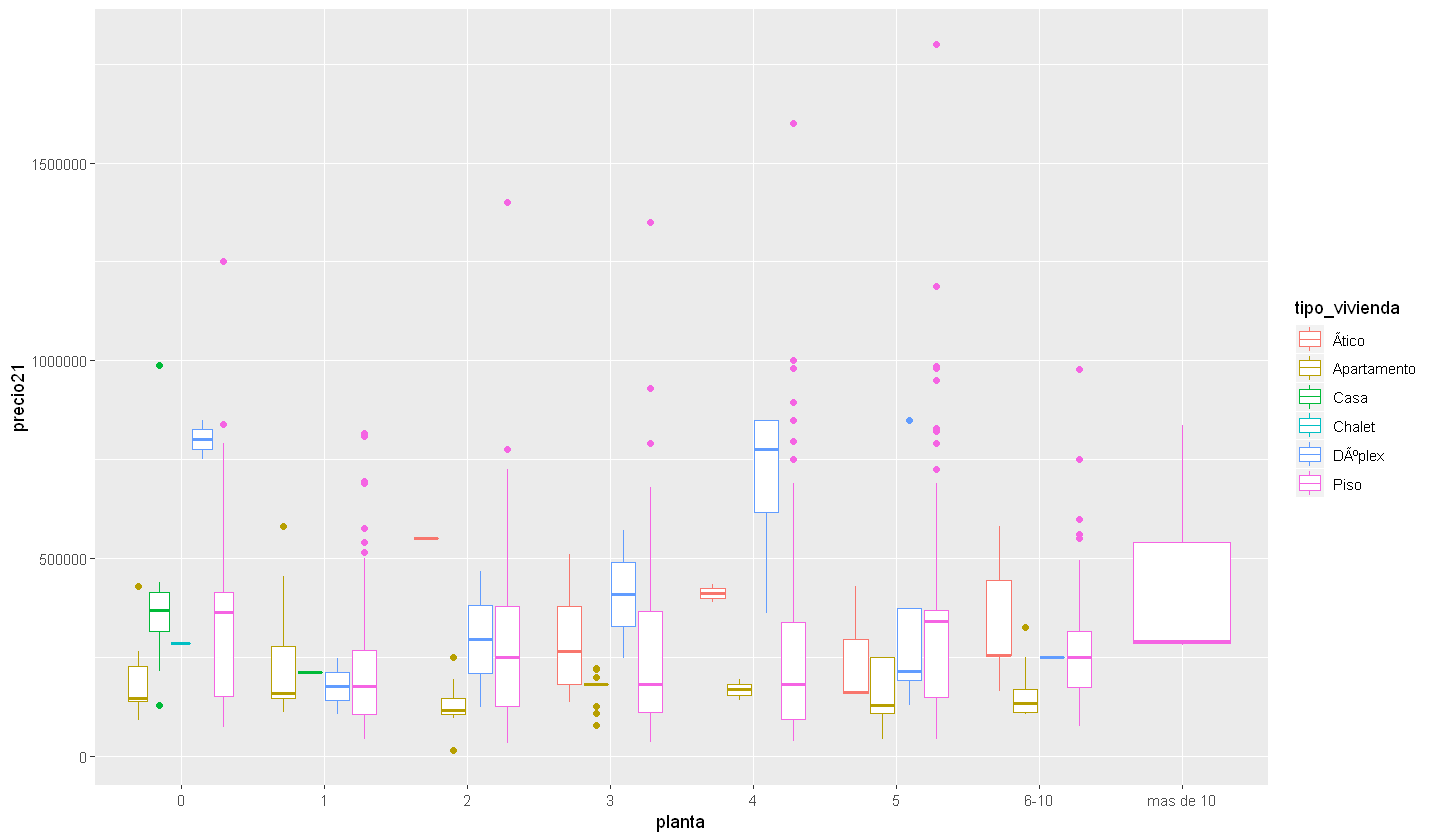

In [20]:
options(repr.plot.height=7,repr.plot.width=12)
ggplot(pisos,aes(x=planta,y=precio21,color=tipo_vivienda))+geom_boxplot()

PRECIO-RENTA MEDIA DISPONIBLE POR BARRIO para TIPO VIVIENDA=PISO

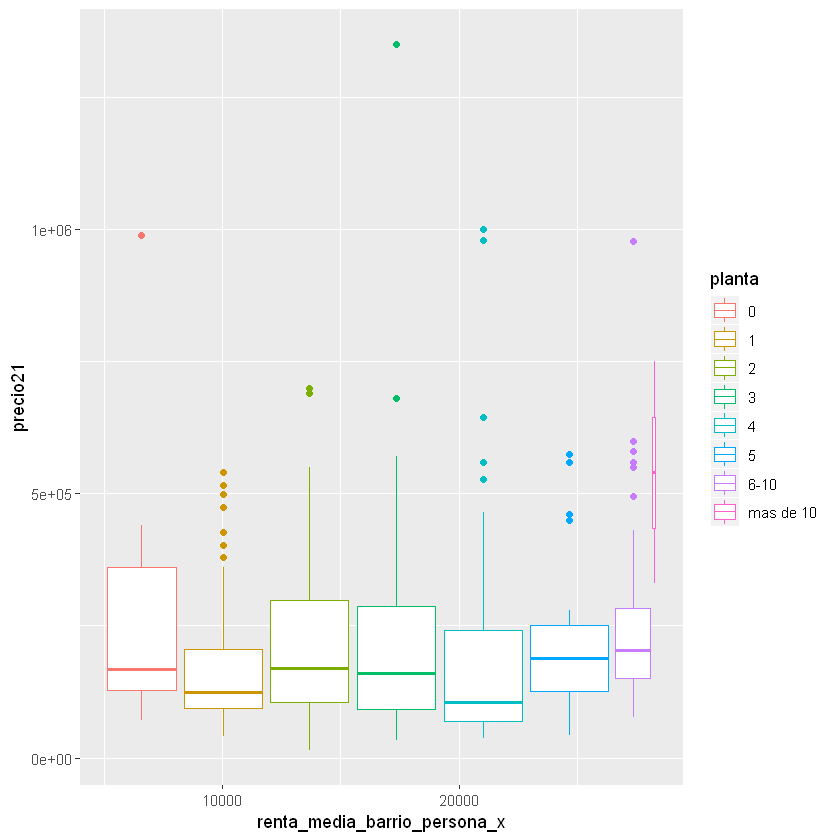

In [21]:
options(repr.plot.height=7,repr.plot.width=7)
ggplot(pisos_val,aes(x=renta_media_barrio_persona_x,y=precio21,color=planta))+geom_boxplot()

PRECIO MEDIO por CIUDAD

In [23]:
for (tipo in levels(pisos$ciudad_x)){
    df<-subset(pisos,ciudad_x==tipo)
    print(paste("El precio medio de vivienda en",tipo,"es",round(mean(df$precio21,na.rm=T),2),'euros'))}


[1] "El precio medio de vivienda en Bilbao es 374794.96 euros"
[1] "El precio medio de vivienda en Valladolid es 206171.3 euros"


PRECIO MEDIO de PISO por CIUDAD

In [24]:
pisos_Pisos<-data.frame(pisos[pisos$tipo_vivienda=="Piso",])
options(repr.plot.height=7,repr.plot.width=10)
for (tipo in levels(pisos_Pisos$ciudad_x)){
    df<-subset(pisos_Pisos,ciudad_x==tipo)
    print(paste("El precio medio de un piso en",tipo,"es",round(mean(df$precio21,na.rm=T),2),'euros'))}


[1] "El precio medio de un piso en Bilbao es 376292.59 euros"
[1] "El precio medio de un piso en Valladolid es 201161.18 euros"


In [25]:
#Compruebo normalidad de los datos: Realizo el test de Saphiro para saber si los datos siguen una distribucion normal 
#(Hipotesis nula)

for (tipo in levels(pisos$ciudad_x)){
    df<-subset(pisos,ciudad_x==tipo)
    print(paste("Ciudad",tipo," = ",mean(df$precio21,na.rm=T)))
    
    sp<-shapiro.test(df$precio21)
    print(paste(" - Test shapiro pvalor = ",sp$p.value))
}

#Pvalor es demasiado pequeño, por tanto, rechazo la Hipotesis nula. 
#No puedo aplicar ANOVA y tengo que usar una prueba no paramétrica -- Krustal Wallis

kt<-kruskal.test(precio21~ciudad_x,pisos)


paste("Por cada ciudad el precio es distinto.Pvalor=",kt$p.value)



[1] "Ciudad Bilbao  =  374794.9609375"
[1] " - Test shapiro pvalor =  4.69594505022134e-19"
[1] "Ciudad Valladolid  =  206171.302405498"
[1] " - Test shapiro pvalor =  4.6951411302568e-26"


[1] "Por cada ciudad el precio es distinto.Pvalor= 6.84952603452125e-45"

PRECIO MEDIO POR PLANTA

In [26]:
for (tipo in levels(pisos$planta)){
    df<-subset(pisos,planta==tipo)
    print(paste("El precio medio de planta ",tipo,"es",round(mean(df$precio21,na.rm=T),2),'euros'))}

[1] "El precio medio de planta  0 es 358727.93 euros"
[1] "El precio medio de planta  1 es 218665.37 euros"
[1] "El precio medio de planta  2 es 269261.98 euros"
[1] "El precio medio de planta  3 es 258048.66 euros"
[1] "El precio medio de planta  4 es 279713.91 euros"
[1] "El precio medio de planta  5 es 342031.59 euros"
[1] "El precio medio de planta  6-10 es 268666.46 euros"
[1] "El precio medio de planta  mas de 10 es 436428.57 euros"


### Pisos que han sufrido evolucion en el precio 

In [57]:
evol<-as.data.frame(table(Evolucion=pisos$evol_precio))
head(evol[order(-evol$Freq),],5)
df_evol_pos<-subset(x = pisos, subset = evol_precio !=0) 

print(paste("Hay ",nrow(df_evol_pos),"pisos que han sufrido una variacion en el precio"))
print(paste("Hay ",nrow(pisos),"pisos que no se han vendido desde 2020"))




,Evolucion,Freq
37,0,588
73,10000,25
84,15000,19
50,3000,17
59,5000,16


[1] "Hay  378 pisos que han sufrido una variacion en el precio"
[1] "Hay  966 pisos que no se han vendido desde 2020"


[1] 378

Los 5 barrios que tienen un mayor número de viviendas en alquiler son


In [15]:
paste("Los 5 barrios con mayor número de pisos son:")

#La variable n_apenteros me guarda un data frame de número de apartamentos en alquiler (Freq) por cada barrio
n_pisos<-as.data.frame(table(Barrio=pisos_Pisos$barrio))
head(n_pisos[order(-n_pisos$Freq),],5)

[1] "Los 5 barrios con mayor número de pisos son:"

,Barrio,Freq
19,Centro (Valladolid Capital),95
35,Las Delicias (Valladolid Capital),89
43,Paseo Zorrilla-Campo Grande-Cuatro de Marzo (Valladolid Capital),68
36,Las Flores-San Isidro-Pajarillos (Valladolid Capital),60
37,Las Villas-Covaresa-Parque Alameda-La Rubia (Valladolid Capital),60


Los 5 barrios de Bilbao que tienen mayor renta media 

In [16]:
piso_bilbao_renta<-aggregate(renta_media_barrio_persona_x~barrio,pisos_bilbao,mean,na.rm=TRUE)
paste("Los 5 barrios con mayor renta de Bilbao son:")
head(piso_bilbao_renta[order(-piso_bilbao_renta$renta_media_barrio_persona_x),],5)



[1] "Los 5 barrios con mayor renta de Bilbao son:"

,barrio,renta_media_barrio_persona_x
1,Abando Ensanche (Distrito Abando. Bilbao),35944
2,Abando Hurtado de AmÃ©zaga (Distrito Abando. Bilbao),35944
18,Indautxu (Bilbao),35702
3,Abandoibarra-Guggenheim (Distrito Abando. Bilbao),35207
13,CastaÃ±os (Distrito Uribarri. Bilbao),29160


Voy a ver si el pmedio de estos barrios está también en el TOP 5

In [18]:
piso_bilbao_pmedio<-aggregate(precio21~barrio,pisos_bilbao,mean,na.rm=TRUE)
paste("Los 5 barrios con mayor pmedio de Bilbao son:")
head(piso_bilbao_pmedio[order(-piso_bilbao_pmedio$precio21),],5)




[1] "Los 5 barrios con mayor pmedio de Bilbao son:"

,barrio,precio21
3,Abandoibarra-Guggenheim (Distrito Abando. Bilbao),818571.4
13,CastaÃ±os (Distrito Uribarri. Bilbao),681727.3
1,Abando Ensanche (Distrito Abando. Bilbao),619634.1
18,Indautxu (Bilbao),586854.2
2,Abando Hurtado de AmÃ©zaga (Distrito Abando. Bilbao),500769.2


In [58]:
mean_price<-aggregate(. ~ barrio, pisos_bilbao[c("barrio","precio21",'renta_media_barrio_persona_x')], mean,na.rm=TRUE)
top_precio<-mean_price[order(mean_price$precio21,decreasing = T),]
head(top_precio,5)
top_precio_barrios<-head(top_precio,5)$barrio

,barrio,precio21,renta_media_barrio_persona_x
3,Abandoibarra-Guggenheim (Distrito Abando. Bilbao),915000.0,35207
12,CastaÃ±os (Distrito Uribarri. Bilbao),729900.0,29160
1,Abando Ensanche (Distrito Abando. Bilbao),637597.1,35944
17,Indautxu (Bilbao),588782.6,35702
2,Abando Hurtado de AmÃ©zaga (Distrito Abando. Bilbao),496666.7,35944


In [59]:
renta_bilbao<-aggregate(. ~ renta_media_barrio_persona_x, pisos_bilbao[c("barrio","precio21",'renta_media_barrio_persona_x')], mean,na.rm=TRUE)
mean_renta<-renta_bilbao[order(renta_bilbao$renta_media_barrio_persona_x,decreasing = T),]
top5renta<-head(mean_renta,5)
top5renta

,renta_media_barrio_persona_x,barrio,precio21
32,35944,1.255319,601614.9
31,35702,30.000000,588782.6
30,35207,3.000000,915000.0
29,29160,17.000000,729900.0
28,24509,9.000000,422314.3


In [60]:
pisos_mas_renta<-pisos_bilbao[pisos_bilbao$renta_media_barrio_persona_x>29000,]
paste("Los 5 barrios de Bilbao con mayor precio y con más de de 28000 euros de renta media:")

#Creo una variable top_renta que voy a utilizar en el siguiente apartado:
top_renta_precio<-head(pisos_mas_renta[order(-pisos_mas_renta$precio21),],5)
top_renta_precio

[1] "Los 5 barrios de Bilbao con mayor precio y con más de de 28000 euros de renta media:"

precio20 precio21
626 1800000  1800000 
868 2000000  1600000 
831 1400000  1400000 
907 1550000  1250000 
891 1250000  1187500 
    titulo_x                                                                   
626 Piso en venta en Plaza Euskadi en Abandoibarra-Guggenheim por 1.800.000 â‚¬
868 Piso en venta en Abando en Indautxu por 2.000.000 â‚¬                      
831 Piso en venta en CastaÃ±os en CastaÃ±os por 1.400.000 â‚¬                  
907 Piso en venta en Ensanche en Indautxu por 1.550.000 â‚¬                    
891 Apartamento en venta en Abando - Albia en Abando Ensanche por 1.250.000 â‚¬
    metros planta tipo_vivienda n_banos n_habitaciones
626 200    5      Piso          4       5             
868 251    4      Piso          3       6             
831 426    2      Piso          4       6             
907 235    0      Piso          4       5             
891 232    5      Piso          4       3             
    barrio                                            ciudad_x ... long lat 
626 Abandoibarra-Guggenheim (Distrito Abando. Bilbao) Bilbao   ... None None
868 Indautxu (Bilbao)                                 Bilbao   ... None None
831 CastaÃ±os (Distrito Uribarri. Bilbao)             Bilbao   ... None None
907 Indautxu (Bilbao)                                 Bilbao   ... None None
891 Abando Ensanche (Distrito Abando. Bilbao)         Bilbao   ... None None
    long_     lat_    
626 -2.938276 43.26644
868 -2.938783 43.26328
831 -2.927257 43.26815
907 -2.931068 43.26359
891 -2.938783 43.26328
    desc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [72]:
modelo<-lm(pisos_mas_renta,formula=precio21~garaje)
summary(modelo)

#Garaje si es estadisticamente significativa, pero no ayuda a predecir el precio (R-squared bajo)


Call:
lm(formula = precio21 ~ garaje, data = pisos_mas_renta)

Residuals:
    Min      1Q  Median      3Q     Max 
-514909 -149999  -14999   95001 1036091 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   564999      29069  19.437  < 2e-16 ***
garaje        198910      52830   3.765 0.000272 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 253400 on 107 degrees of freedom
Multiple R-squared:  0.117,	Adjusted R-squared:  0.1087 
F-statistic: 14.18 on 1 and 107 DF,  p-value: 0.0002724


Analizo el barrio que más influencia en el precio (de manera estadística). El barrio de ABANDO ENSANCHE hace aumentar el precio en 577,333 euros

In [62]:
modelo<-lm(pisos_mas_renta,formula=precio21~barrio)
summary(modelo)




Call:
lm(formula = precio21 ~ barrio, data = pisos_mas_renta)

Residuals:
    Min      1Q  Median      3Q     Max 
-529900 -158783  -47597  120100 1011217 

Coefficients:
                                                           Estimate Std. Error
(Intercept)                                                  637597      43550
barrioAbando Hurtado de AmÃ©zaga (Distrito Abando. Bilbao)  -140931      86188
barrioAbandoibarra-Guggenheim (Distrito Abando. Bilbao)      277403     113842
barrioCastaÃ±os (Distrito Uribarri. Bilbao)                   92303      92383
barrioIndautxu (Bilbao)                                      -48815      57790
                                                           t value Pr(>|t|)    
(Intercept)                                                 14.641   <2e-16 ***
barrioAbando Hurtado de AmÃ©zaga (Distrito Abando. Bilbao)  -1.635   0.1050    
barrioAbandoibarra-Guggenheim (Distrito Abando. Bilbao)      2.437   0.0165 *  
barrioCastaÃ±os (Distrito Uribarri

Analizo la influencia de los metros en el precio del piso. Por cada metro, el precio de un piso aumenta en 3382 euros, pero no ayuda mucho a la hora de conocer el precio de un inmueble

In [71]:
modelo<-lm(pisos,formula=precio21~metros)
summary(modelo)


Call:
lm(formula = precio21 ~ metros, data = pisos)

Residuals:
    Min      1Q  Median      3Q     Max 
-725478  -99825  -26917   80591 1276497 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8648.73   11390.53  -0.759    0.448    
metros       2660.76      96.35  27.615   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 157200 on 964 degrees of freedom
Multiple R-squared:  0.4417,	Adjusted R-squared:  0.4411 
F-statistic: 762.6 on 1 and 964 DF,  p-value: < 2.2e-16


In [64]:
modelo<-lm(pisos_bilbao,formula=precio21~renta_media_barrio_persona_x)
summary(modelo)


Call:
lm(formula = precio21 ~ renta_media_barrio_persona_x, data = pisos_bilbao)

Residuals:
    Min      1Q  Median      3Q     Max 
-386502  -80923  -24739   65352 1180144 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -1.276e+05  2.746e+04  -4.646 4.66e-06 ***
renta_media_barrio_persona_x  2.123e+01  1.102e+00  19.271  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 169100 on 382 degrees of freedom
Multiple R-squared:  0.493,	Adjusted R-squared:  0.4916 
F-statistic: 371.4 on 1 and 382 DF,  p-value: < 2.2e-16


Analizo la influencia del numero de baños en el precio final. 

In [65]:
modelo<-lm(pisos_bilbao,formula=precio21~n_banos)
summary(modelo)


Call:
lm(formula = precio21 ~ n_banos, data = pisos_bilbao)

Residuals:
    Min      1Q  Median      3Q     Max 
-409309  -94087  -44087   71988  908839 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -11062      19697  -0.562    0.575    
n_banos       234074      10878  21.518   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 159700 on 382 degrees of freedom
Multiple R-squared:  0.5479,	Adjusted R-squared:  0.5468 
F-statistic:   463 on 1 and 382 DF,  p-value: < 2.2e-16


In [66]:
modelo<-lm(pisos_mas_renta,formula=precio21~n_banos)
summary(modelo)


Call:
lm(formula = precio21 ~ n_banos, data = pisos_mas_renta)

Residuals:
    Min      1Q  Median      3Q     Max 
-364073 -133775    7628  105927  757628 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   172476      44751   3.854 0.000198 ***
n_banos       223299      20275  11.013  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 184600 on 107 degrees of freedom
Multiple R-squared:  0.5313,	Adjusted R-squared:  0.5269 
F-statistic: 121.3 on 1 and 107 DF,  p-value: < 2.2e-16


In [67]:
modelo<-lm(pisos_mas_renta,formula=precio21~planta)
summary(modelo)


Call:
lm(formula = precio21 ~ planta, data = pisos_mas_renta)

Residuals:
    Min      1Q  Median      3Q     Max 
-531042 -145650  -18739  119040  969300 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       696923      70440   9.894   <2e-16 ***
planta1          -125963      96239  -1.309   0.1936    
planta2          -128184      88126  -1.455   0.1489    
planta3          -126273      90481  -1.396   0.1659    
planta4           -66223      90481  -0.732   0.4659    
planta5           179119     101671   1.762   0.0811 .  
planta6-10       -283123     133650  -2.118   0.0366 *  
plantamas de 10   138077     263561   0.524   0.6015    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 254000 on 101 degrees of freedom
Multiple R-squared:  0.1628,	Adjusted R-squared:  0.1048 
F-statistic: 2.806 on 7 and 101 DF,  p-value: 0.01036


In [93]:
modelo<-lm(pisos_val,formula=precio21~evol_precio)
summary(modelo)


Call:
lm(formula = precio21 ~ evol_precio, data = pisos_val)

Residuals:
    Min      1Q  Median      3Q     Max 
-194399 -107276  -49789   51157 1146724 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.033e+05  6.869e+03  29.594   <2e-16 ***
evol_precio 6.045e-01  4.332e-01   1.395    0.163    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 158000 on 580 degrees of freedom
Multiple R-squared:  0.003346,	Adjusted R-squared:  0.001628 
F-statistic: 1.947 on 1 and 580 DF,  p-value: 0.1634


In [73]:
modelo<-lm(pisos_bilbao,formula=precio21~garaje)
summary(modelo)


Call:
lm(formula = precio21 ~ garaje, data = pisos_bilbao)

Residuals:
    Min      1Q  Median      3Q     Max 
-339510 -159063  -73034   84602 1325495 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   330563      13980  23.645  < 2e-16 ***
garaje        143942      25219   5.708  2.3e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 228000 on 382 degrees of freedom
Multiple R-squared:  0.07858,	Adjusted R-squared:  0.07617 
F-statistic: 32.58 on 1 and 382 DF,  p-value: 2.302e-08


Observo que el numero de habitaciones y si tiene o no garaje no ayudan a la hora de predecir el precio

In [70]:
modelo<-lm(pisos,formula=precio21~planta+tipo_vivienda)
summary(modelo)


Call:
lm(formula = precio21 ~ planta + tipo_vivienda, data = pisos)

Residuals:
    Min      1Q  Median      3Q     Max 
-381172 -136831  -43331   74334 1454576 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                415973      52537   7.918 6.70e-15 ***
planta1                   -139848      29610  -4.723 2.67e-06 ***
planta2                    -87645      29721  -2.949  0.00327 ** 
planta3                    -99706      29735  -3.353  0.00083 ***
planta4                    -88117      32037  -2.750  0.00606 ** 
planta5                    -17755      33671  -0.527  0.59811    
planta6-10                 -89588      32049  -2.795  0.00529 ** 
plantamas de 10             73250      81222   0.902  0.36737    
tipo_viviendaApartamento  -163586      51310  -3.188  0.00148 ** 
tipo_viviendaCasa          -36677      76520  -0.479  0.63183    
tipo_viviendaChalet       -129973     210348  -0.618  0.53679    
tipo_viviendaDÃºplex       109

In [92]:
modelo<-lm(pisos,formula=precio21~n_banos+metros+barrio+evol_precio+garaje)
summary(modelo)


Call:
lm(formula = precio21 ~ n_banos + metros + barrio + evol_precio + 
    garaje, data = pisos)

Residuals:
    Min      1Q  Median      3Q     Max 
-413278  -37442    -327   33072  927495 

Coefficients:
                                                                               Estimate
(Intercept)                                                                   2.793e+05
n_banos                                                                       7.702e+04
metros                                                                        1.351e+03
barrioAbando Hurtado de AmÃ©zaga (Distrito Abando. Bilbao)                   -1.376e+05
barrioAbandoibarra-Guggenheim (Distrito Abando. Bilbao)                       2.904e+05
barrioAltamira (Distrito Basurtu-Zorrotza. Bilbao)                           -3.031e+05
barrioAmetzola (Distrito Errekalde. Bilbao)                                  -1.985e+05
barrioArangoiti (Distrito Deustu. Bilbao)                                    -2.950e+05

Aun así, también puedo analizar cuánto aportaría al precio que la vivienda tuviese garaje o trastero, con un margen de error del 95% 



In [36]:
model<-lm(pisos_val,formula=precio21~garaje)
confint(model)["garaje",]

2.5 %    97.5 % 
 71534.21 112301.98

In [37]:
model<-lm(pisos,formula=precio21~metros)
confint(model)["metros",]

2.5 %   97.5 % 
1834.493 2117.037

In [38]:
model<-lm(pisos,formula=precio21~trastero)
confint(model)["trastero",]

2.5 %    97.5 % 
 6259.005 50771.842

In [39]:
model<-lm(pisos_val,formula=precio21~n_banos)
confint(model)["n_banos",]

2.5 %   97.5 % 
110190.2 130822.5

¿Puedo calcular cuál es la probabilidad de encontrar una vivienda por mas de 1M euros en Bilbao con un margen de error


In [40]:
mas_1M<-sum(pisos_bilbao$precio21>1000000)
numTotal<-nrow(pisos_bilbao)
print(paste("La probabilidad es:",mas_1M/numTotal))
print(paste0("El margen de confianza es:[",paste0(binom.test(mas_1M,numTotal)$conf,collapse=","),"]"))

[1] "La probabilidad es: 0.00980392156862745"
[1] "El margen de confianza es:[0.00319075377646228,0.0227298295820226]"
